In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malaria-detection-with-fastai-v2/__results__.html
/kaggle/input/malaria-detection-with-fastai-v2/custom.css
/kaggle/input/malaria-detection-with-fastai-v2/__notebook__.ipynb
/kaggle/input/malaria-detection-with-fastai-v2/__output__.json
/kaggle/input/malaria-detection-with-fastai-v2/__resultx__.html
/kaggle/input/malaria-detection-with-fastai-v2/__results___files/__results___15_1.png
/kaggle/input/malaria-detection-with-fastai-v2/__results___files/__results___19_1.png
/kaggle/input/malaria-detection-with-fastai-v2/__results___files/__results___9_0.png
/kaggle/input/malaria-detection-with-fastai-v2/models/stage-1.pth


In [2]:
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

In [3]:
image_directory = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/'
SIZE = 64
dataset = []    
label = []  

In [5]:
parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):    
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)


uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

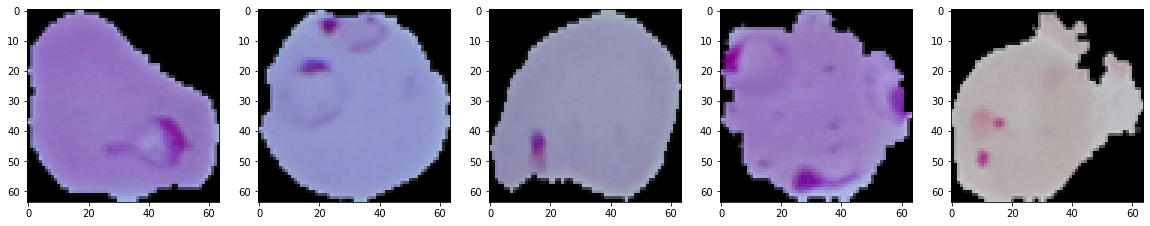

In [6]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

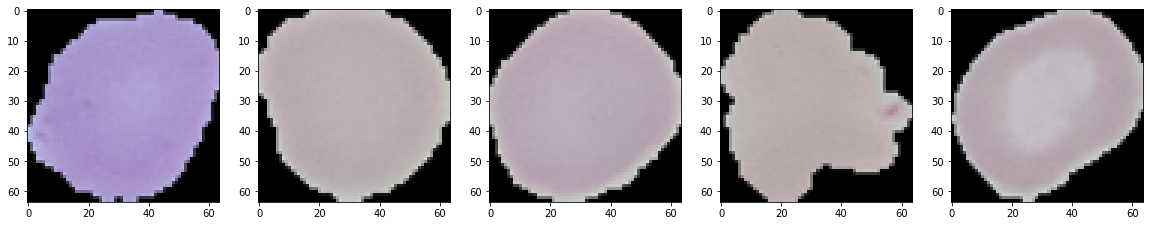

In [7]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

In [8]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        1

In [10]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)


In [11]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 75, 
                         verbose = 1, 
                         epochs = 35,      
                         validation_split = 0.1,
                         shuffle = False
                      
                     )

Epoch 1/35
265/265 [==============================] - 55s 207ms/step - loss: 0.4299 - accuracy: 0.8024 - val_loss: 3.3713 - val_accuracy: 0.5651
Epoch 2/35
265/265 [==============================] - 54s 205ms/step - loss: 0.2155 - accuracy: 0.9195 - val_loss: 0.5434 - val_accuracy: 0.8481
Epoch 3/35
265/265 [==============================] - 54s 204ms/step - loss: 0.1776 - accuracy: 0.9348 - val_loss: 0.1942 - val_accuracy: 0.9206
Epoch 4/35
265/265 [==============================] - 54s 205ms/step - loss: 0.1565 - accuracy: 0.9411 - val_loss: 0.1701 - val_accuracy: 0.9388
Epoch 5/35
265/265 [==============================] - 54s 203ms/step - loss: 0.1431 - accuracy: 0.9464 - val_loss: 0.1791 - val_accuracy: 0.9288
Epoch 6/35
265/265 [==============================] - 54s 203ms/step - loss: 0.1305 - accuracy: 0.9513 - val_loss: 0.1837 - val_accuracy: 0.9424
Epoch 7/35
265/265 [==============================] - 54s 203ms/step - loss: 0.1097 - accuracy: 0.9585 - val_loss: 0.1649 - val_ac

In [12]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

173/173 [==============================] - 4s 21ms/step - loss: 0.2764 - accuracy: 0.9485
Test_Accuracy: 94.85%


In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
